In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
CollegeReviewCompiled = pd.read_csv(r'/content/CompileReviews-8-11-2022.csv')
CollegeReviewCompiled.tail(2)

,author,reviewBody,reviewRating,ratingMaxvalue,dateCreated,reviewUrl,reviewSource,name,address,Sentiment
331,0.30 s,NaN,2.0,5.0,2017,www.google.com,www.google.com,University of Limerick,University of Limerick,NaN
332,Karolina,NaN,3.0,5.0,2018,www.google.com,www.google.com,University of Limerick,University of Limerick,NaN


In [ ]:
Sentiment_calc=CollegeReviewCompiled.drop(['Sentiment'], axis=1)

In [ ]:
def sentiments(rating):
    if  (rating >= 3.5):
        return 1
   # elif (rating >= 3) and (rating < 4):
    #    return 'Neutral'
    elif (rating < 3.5):
        return 0
   # else: return 'Neutral'
# Add sentiments to the data
Sentiment_calc['Sentiment'] = Sentiment_calc['reviewRating'].apply(sentiments)

In [ ]:
CollegeReviewCompiled=Sentiment_calc.drop(['author', 'ratingMaxvalue','dateCreated','reviewUrl','reviewSource','name','address','reviewRating'], axis=1)

In [ ]:

CollegeReviewCompiled.reviewBody = CollegeReviewCompiled.reviewBody.fillna(' mess,bad,dirty,rude,dishonest,cheat,expensive,unworthy')

In [ ]:

CollegeReviewCompiled.Sentiment = CollegeReviewCompiled.Sentiment.fillna(0)

In [ ]:
CollegeReviewCompiled.tail()

,reviewBody,Sentiment
328,"mess,bad,dirty,rude,dishonest,cheat,expensive...",0.0
329,"mess,bad,dirty,rude,dishonest,cheat,expensive...",0.0
330,"mess,bad,dirty,rude,dishonest,cheat,expensive...",0.0
331,"mess,bad,dirty,rude,dishonest,cheat,expensive...",0.0
332,"mess,bad,dirty,rude,dishonest,cheat,expensive...",0.0


In [ ]:
CollegeReviewCompiled = CollegeReviewCompiled.astype({'Sentiment':'int'})

In [ ]:
CollegeReviewCompiled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewBody  333 non-null    object
 1   Sentiment   333 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.3+ KB


In [ ]:
CollegeReviewCompiled['Sentiment'].value_counts(normalize=True)

1    0.567568
0    0.432432
Name: Sentiment, dtype: float64

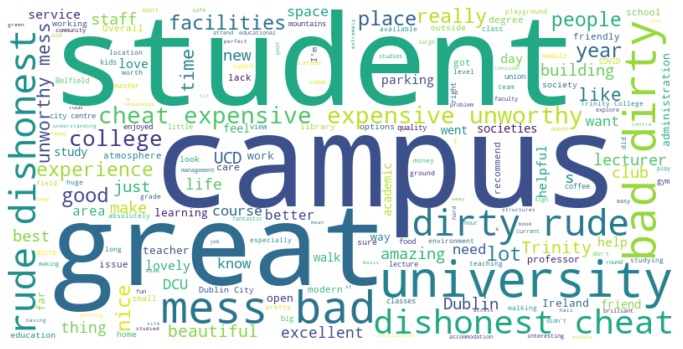

In [ ]:

# Concatenate the text review data
reviews = " ".join(CollegeReviewCompiled["reviewBody"])
# Create the word cloud image
word_cloud=WordCloud(background_color="white",stopwords=ENGLISH_STOP_WORDS,
                     width=800,
                    height=400
                     )
# Generate the word oud using the review data
word_cloud.generate(reviews)
# Display the word cloud
plt.rcParams["figure.figsize"] = (12, 8)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:

# Specify the word pattern
pattern=r"[a-zA-Z]+"
# Build the vectorizer and fit to the text data
vect = TfidfVectorizer(
token_pattern=pattern,
stop_words=ENGLISH_STOP_WORDS,
ngram_range=(1, 2),
max_features=500
)
vect.fit(CollegeReviewCompiled["reviewBody"])
# Create sparse matrix from the vectorizer
tokenized_features=vect.transform(CollegeReviewCompiled["reviewBody"])
# Create a DataFrame of the new features
features=pd.DataFrame(data=tokenized_features.toarray(),
columns=vect.get_feature_names_out())
features

,able,absolutely,academic,access,accommodation,administration,advice,amazing,amazing beautiful,amazing campus,...,went,wifi,wonderful,work,working,world,worst,worth,year,years
0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
1,0.0,0.0,0.0,0.22626,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
2,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.271795,0.0,0.23965
3,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
4,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
329,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
330,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
331,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000


In [ ]:
print(tokenized_features.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.2717955  0.         0.23965037]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
print(vect.get_feature_names_out())

['able' 'absolutely' 'academic' 'access' 'accommodation' 'administration'
 'advice' 'amazing' 'amazing beautiful' 'amazing campus' 'amazing place'
 'american' 'approx' 'approx km' 'architecture' 'area' 'areas' 'array'
 'art' 'ask' 'atmosphere' 'attend' 'available' 'avoid' 'avoid place'
 'away' 'awful' 'bad' 'bad dirty' 'bar' 'based' 'basically' 'beautiful'
 'beautiful campus' 'beautiful feels' 'beautiful open' 'belfield' 'best'
 'best university' 'better' 'big' 'blocked' 'body' 'book' 'bridge'
 'brilliant' 'building' 'buildings' 'bus' 'cafeteria' 'campus'
 'campus beautiful' 'campus facilities' 'campus good' 'campus great'
 'campus nice' 'campus student' 'canteen' 'car' 'car parks' 'care'
 'career' 'careers' 'careers service' 'cctv' 'centre' 'changed' 'cheat'
 'cheat expensive' 'children' 'children s' 'choose' 'circular'
 'circular road' 'city' 'city centre' 'city dublin' 'city university'
 'class' 'classes' 'clear' 'close' 'club' 'clubs' 'clubs societies'
 'coffee' 'college' 'college 

In [ ]:
# Generate a number of different length metrics based on the text
CollegeReviewCompiled["char_count"] = CollegeReviewCompiled["reviewBody"].str.count( "\S")
CollegeReviewCompiled["word_count"] = CollegeReviewCompiled["reviewBody"].str.count(pattern)
CollegeReviewCompiled["avg_word_length"] = CollegeReviewCompiled["char_count"] /CollegeReviewCompiled["word_count"]
# Preview our new columns
CollegeReviewCompiled.sample(3)

,reviewBody,Sentiment,char_count,word_count,avg_word_length
264,What an amazing place. The campus is absolutel...,1,405,90,4.500000
284,"mess,bad,dirty,rude,dishonest,cheat,expensive...",0,54,8,6.750000
172,Hi\nMy name is Rashi. I completed my master’s ...,1,659,137,4.810219


In [ ]:
CollegeReviewCompiled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviewBody       333 non-null    object 
 1   Sentiment        333 non-null    int64  
 2   char_count       333 non-null    int64  
 3   word_count       333 non-null    int64  
 4   avg_word_length  333 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 13.1+ KB


# **Implementing Machine Learning Algorithms**
## Random Forest, Decision Tree, Logistic Regression,K-Nearest Neighbors

#Train Test Split

In [ ]:

# Define X and y
X = pd.concat([features, CollegeReviewCompiled.loc[:, "char_count":]], axis=1)
y =CollegeReviewCompiled["Sentiment"]
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
              X,
              y,
              test_size=0.25,
              random_state=42
)


              precision    recall  f1-score   support

           0       0.79      0.65      0.71        34
           1       0.79      0.88      0.83        50

    accuracy                           0.79        84
   macro avg       0.79      0.76      0.77        84
weighted avg       0.79      0.79      0.78        84



# Train a random forest classifier

In [ ]:

rf=RandomForestClassifier(random_state=42) .fit(X_train, y_train)
#Predict the labels.
y_pred=rf.predict(X_test)
# Print classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71        34
           1       0.79      0.88      0.83        50

    accuracy                           0.79        84
   macro avg       0.79      0.76      0.77        84
weighted avg       0.79      0.79      0.78        84



In [ ]:
print(y_pred)

[1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1
 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 1 1 1 0 0]


# Print a confusion matrix for the model

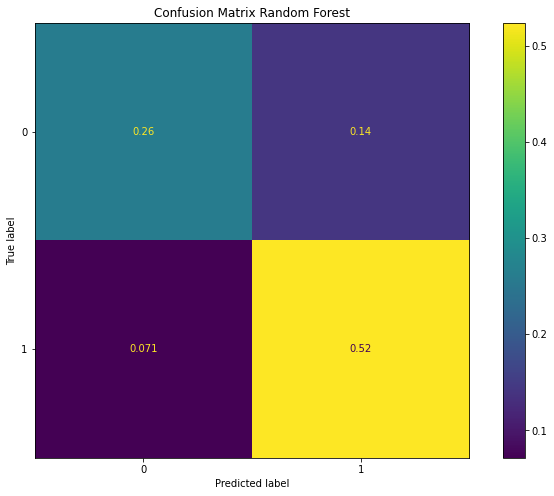

In [ ]:


ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, normalize="all")
plt.title("Confusion Matrix Random Forest")
plt.show()


## Visualize the feature importance

In [ ]:
# Create a DataFrame of the features and their importances
pd.DataFrame(
{"feature": X.columns, "importance": rf.feature_importances_}
).sort_values(by="importance", ascending=False)

,feature,importance
500,char_count,0.041599
501,word_count,0.035290
420,students,0.029538
502,avg_word_length,0.029081
27,bad,0.024378
...,...,...
281,match,0.000000
284,meet new,0.000000
55,campus nice,0.000000
290,mistakes,0.000000


#Decision Tree

In [ ]:

dt=DecisionTreeClassifier(random_state=42) .fit(X_train, y_train)
#Predict the labels.
y_pred=dt.predict(X_test)
# Print classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67        34
           1       0.77      0.80      0.78        50

    accuracy                           0.74        84
   macro avg       0.73      0.72      0.73        84
weighted avg       0.74      0.74      0.74        84



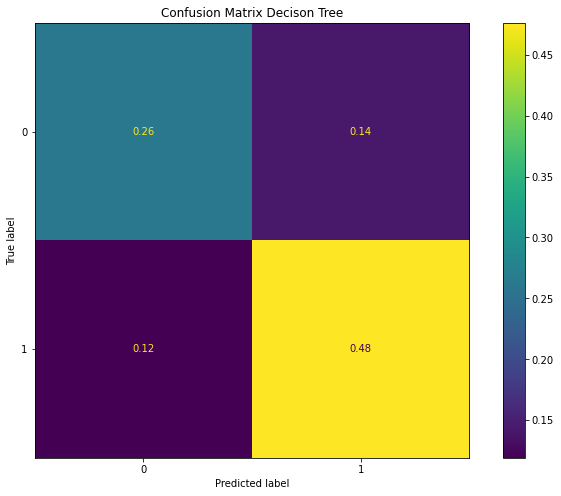

In [ ]:

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, normalize="all")
plt.title("Confusion Matrix Decison Tree")
plt.show()


In [ ]:
# Create a DataFrame of the features and their importances
pd.DataFrame(
{"feature": X.columns, "importance": dt.feature_importances_}
).sort_values(by="importance", ascending=False)

,feature,importance
149,expensive,0.191100
432,t,0.082995
420,students,0.064601
501,word_count,0.048693
300,need,0.043059
...,...,...
168,free,0.000000
167,food,0.000000
166,final,0.000000
165,fields,0.000000


#Logistic Regression Classifier

In [ ]:
#lbfgs stand for: "Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm". It is one of the solvers' algorithms provided by Scikit-Learn Library.


lr=LogisticRegression(random_state=42,solver='lbfgs', max_iter=100).fit(X_train, y_train)
#Predict the labels.
y_pred=dt.predict(X_test)
# Print classification metrics
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.69      0.65      0.67        34
           1       0.77      0.80      0.78        50

    accuracy                           0.74        84
   macro avg       0.73      0.72      0.73        84
weighted avg       0.74      0.74      0.74        84



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


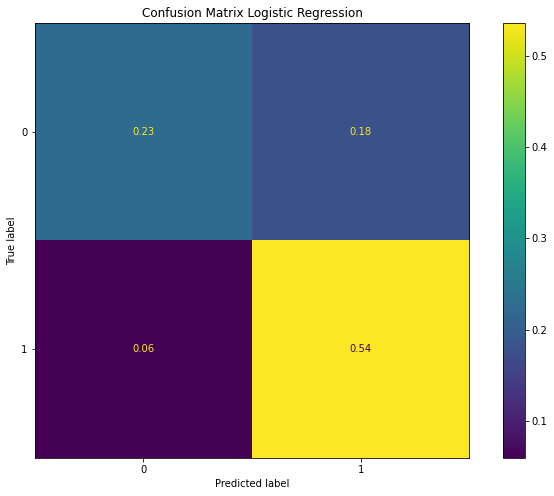

In [ ]:

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, normalize="all")
plt.title("Confusion Matrix Logistic Regression")
plt.show()


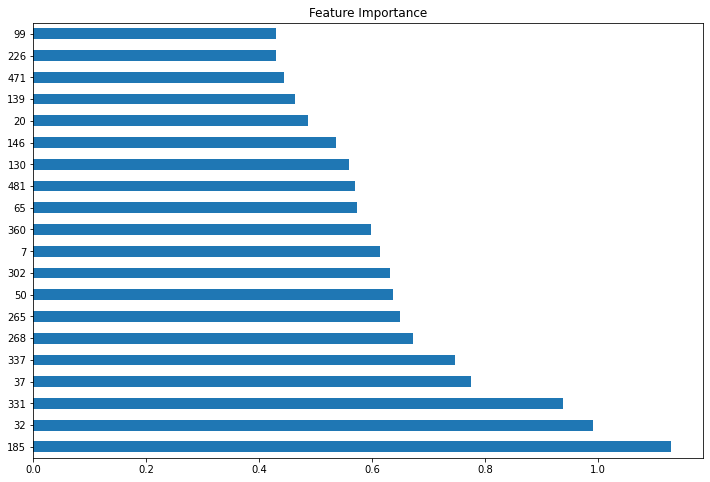

In [ ]:
# Create a DataFrame of the features and their importances
#pd.DataFrame(
#{"feature": X.columns, "importance": lr.feature_importances_}
#).sort_values(by="importance", ascending=False)


importance = lr.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')



from sklearn.neighbors import KNeighborsClassifier

## KNeighborsClassifier

In [ ]:

kn=KNeighborsClassifier(n_neighbors=3) .fit(X_train, y_train)
#Predict the labels.
y_pred=kn.predict(X_test)
# Print classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62        34
           1       0.74      0.78      0.76        50

    accuracy                           0.70        84
   macro avg       0.69      0.68      0.69        84
weighted avg       0.70      0.70      0.70        84



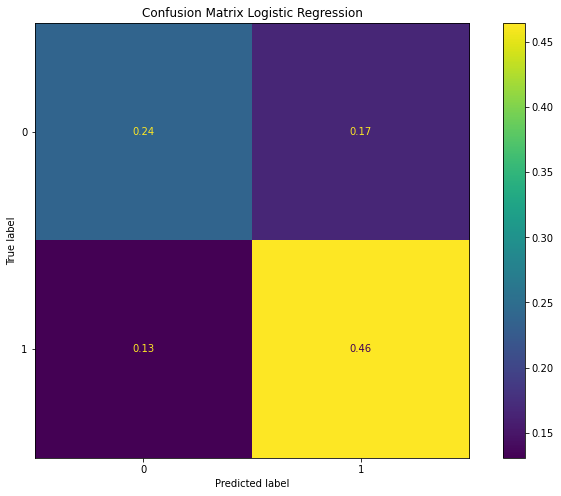

In [ ]:

ConfusionMatrixDisplay.from_estimator(kn, X_test, y_test, normalize="all")
plt.title("Confusion Matrix Logistic Regression")
plt.show()


## Testing and Verification in progress

In [ ]:
# initialize list elements
data = ["The College is bad and rude"]

# Using 'Address' as the column name
# and equating it to the list

# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(data, columns=['revws'])

# print dataframe.
df

#CollegeReviewCompiled["reviewBody"]

,revws
0,The College is bad and rude


In [ ]:
sentimen = [0]
df['sentimen'] = sentimen
  

In [ ]:
df

,revws,sentimen
0,The College is bad and rude,0


In [ ]:
# Specify the word pattern
pattern=r"[a-zA-Z]+"
# Build the vectorizer and fit to the text data
vect = TfidfVectorizer(
token_pattern=pattern,
stop_words=ENGLISH_STOP_WORDS,
ngram_range=(1, 2),
max_features=500
)
vect.fit(df["revws"])
# Create sparse matrix from the vectorizer
tokenized_features=vect.transform(df["revws"])
# Create a DataFrame of the new features
features=pd.DataFrame(data=tokenized_features.toarray(),
columns=vect.get_feature_names_out())
features

,bad,bad rude,college,college bad,rude
0,0.447214,0.447214,0.447214,0.447214,0.447214


In [ ]:
print(vect.get_feature_names_out())

['bad' 'bad rude' 'college' 'college bad' 'rude']


In [ ]:
print(tokenized_features.toarray())

[[0.4472136 0.4472136 0.4472136 0.4472136 0.4472136]]


In [ ]:

# Define X and y
X = pd.concat([features, df.loc[:, "char_count":]], axis=1)
y =df["sentimen"]
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
              X,
              y,
              test_size=0.25,
              random_state=42
)


ValueError: ignored